# Used car sales - Data Analysis

## Data Import and First Inspection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualizations
plt.rcParams['figure.figsize'] = [8, 4]
sns.set_theme(style='darkgrid')

# Load dataset into a DataFrame
cars_df = pd.read_csv("toyota.csv", sep=",")

In [2]:
cars_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [3]:
cars_df.shape

(6738, 9)

In [4]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [5]:
print(f"Summary statistics:\n{cars_df.describe()}\n")
print(f"Summary object columns:\n{cars_df.describe(exclude='number')}\n")

Summary statistics:
              year         price        mileage          tax          mpg  \
count  6738.000000   6738.000000    6738.000000  6738.000000  6738.000000   
mean   2016.748145  12522.391066   22857.413921    94.697240    63.042223   
std       2.204062   6345.017587   19125.464147    73.880776    15.836710   
min    1998.000000    850.000000       2.000000     0.000000     2.800000   
25%    2016.000000   8290.000000    9446.000000     0.000000    55.400000   
50%    2017.000000  10795.000000   18513.000000   135.000000    62.800000   
75%    2018.000000  14995.000000   31063.750000   145.000000    69.000000   
max    2020.000000  59995.000000  174419.000000   565.000000   235.000000   

        engineSize  
count  6738.000000  
mean      1.471297  
std       0.436159  
min       0.000000  
25%       1.000000  
50%       1.500000  
75%       1.800000  
max       4.500000  

Summary object columns:
         model transmission fuelType
count     6738         6738     673

In [6]:
# Print unique values and value counts
for col in cars_df.columns:
    if cars_df[col].dtype=='object':
        print(f"Column name: {col}\n")
        print(f"Unique values:\n{cars_df[col].unique()}\n")
        print(f"Value count:\n{cars_df[col].value_counts()}\n")

Column name: model

Unique values:
[' GT86' ' Corolla' ' RAV4' ' Yaris' ' Auris' ' Aygo' ' C-HR' ' Prius'
 ' Avensis' ' Verso' ' Hilux' ' PROACE VERSO' ' Land Cruiser' ' Supra'
 ' Camry' ' Verso-S' ' IQ' ' Urban Cruiser']

Value count:
 Yaris            2122
 Aygo             1961
 Auris             712
 C-HR              479
 RAV4              473
 Corolla           267
 Prius             232
 Avensis           115
 Verso             114
 Hilux              86
 GT86               73
 Land Cruiser       51
 PROACE VERSO       15
 Supra              12
 Camry              11
 IQ                  8
 Urban Cruiser       4
 Verso-S             3
Name: model, dtype: int64

Column name: transmission

Unique values:
['Manual' 'Automatic' 'Semi-Auto' 'Other']

Value count:
Manual       3826
Automatic    2657
Semi-Auto     254
Other           1
Name: transmission, dtype: int64

Column name: fuelType

Unique values:
['Petrol' 'Other' 'Hybrid' 'Diesel']

Value count:
Petrol    4087
Hybrid    2043

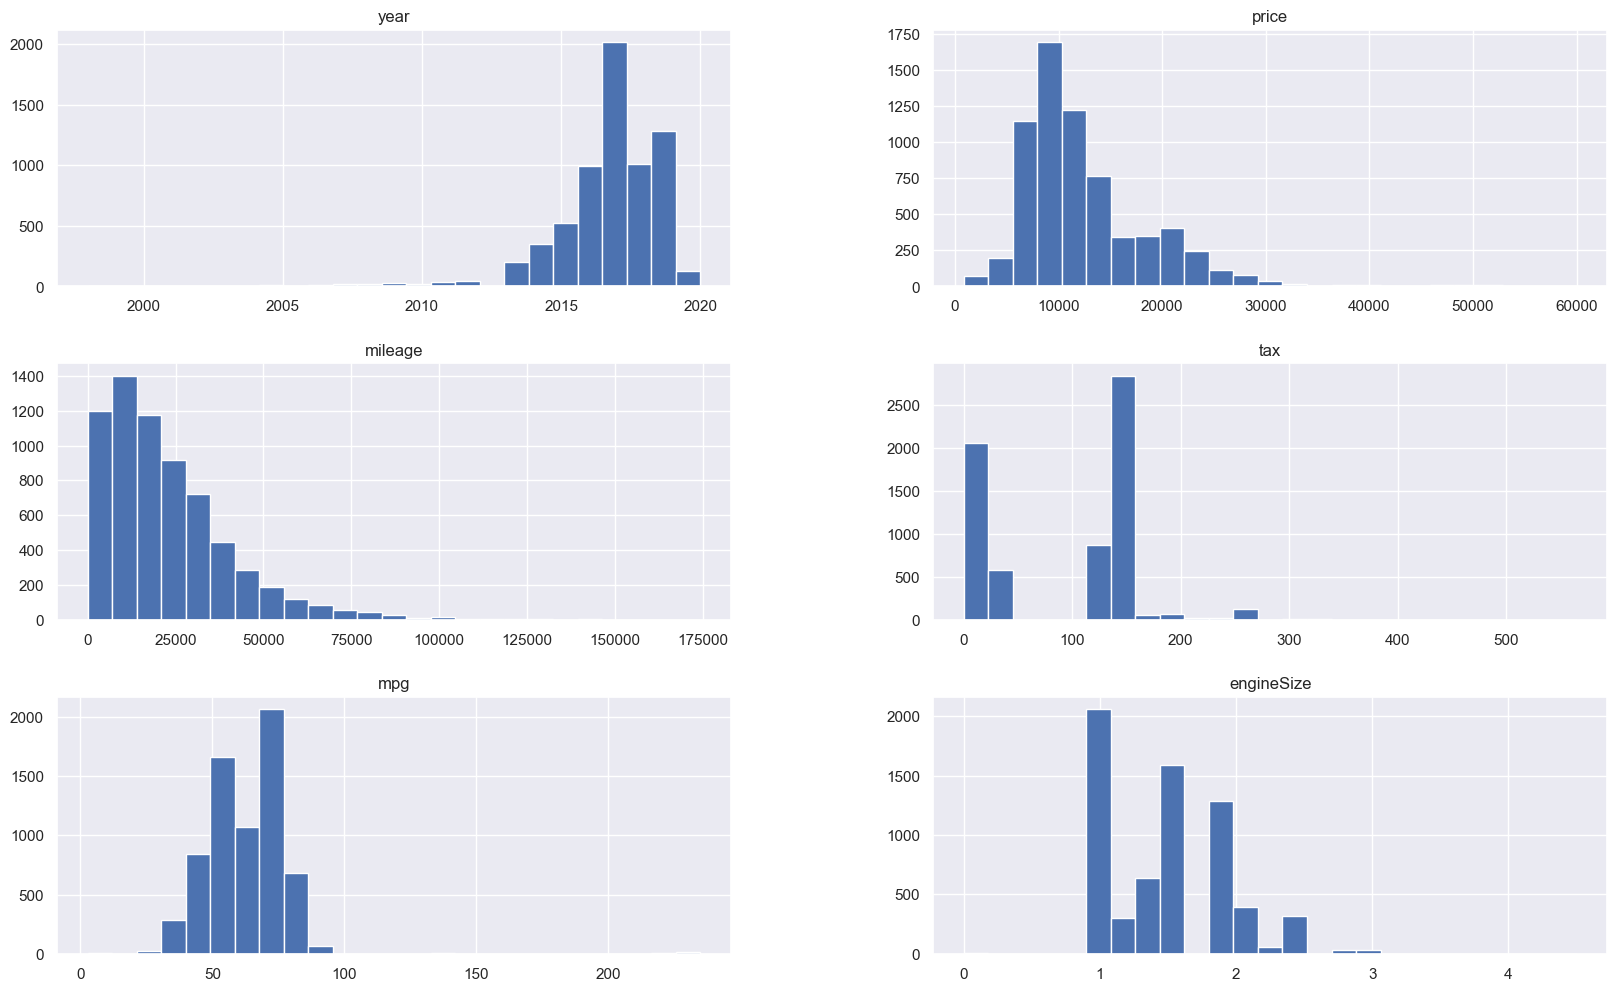

In [7]:
cars_df.hist(figsize= (20, 12), bins = 25)
plt.show()

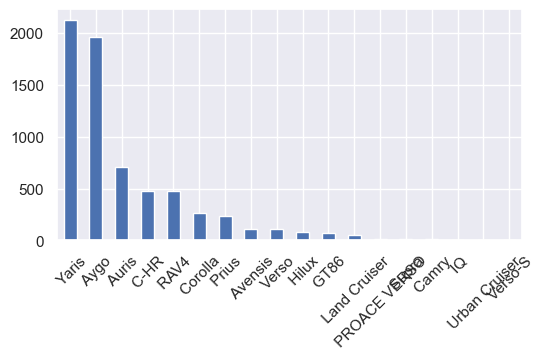

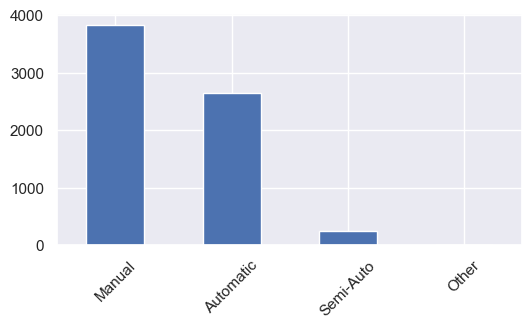

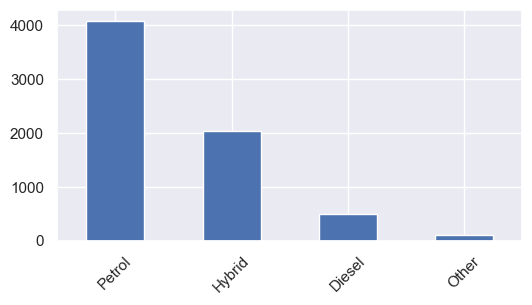

In [8]:
cat_cols = ['model', 'transmission', 'fuelType']
for col in cat_cols:
    cars_df[col].value_counts().plot(kind="bar", figsize= (6, 3), rot=45)
    plt.show()

# Cleaning data

In [9]:
cars_df.rename(columns={"fuelType": "fuel_type", "engineSize": "engine_size"}, inplace=True)
cars_df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuel_type', 'tax',
       'mpg', 'engine_size'],
      dtype='object')

## Cleaning column: "model"

In [10]:
cars_df['model'] = cars_df['model'].apply(lambda x: x.strip())
cars_df['model'].replace('PROACE VERSO', 'PROACE VERSO'.title(), inplace=True)
cars_df['model'].unique()

array(['GT86', 'Corolla', 'RAV4', 'Yaris', 'Auris', 'Aygo', 'C-HR',
       'Prius', 'Avensis', 'Verso', 'Hilux', 'Proace Verso',
       'Land Cruiser', 'Supra', 'Camry', 'Verso-S', 'IQ', 'Urban Cruiser'],
      dtype=object)

## Cleaning column: "transmission"

In [11]:
cars_df[cars_df['transmission']=='Other']

,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size
2458,Yaris,2015,12795,Other,16733,Hybrid,0,78.0,1.5


In [12]:
cars_df[cars_df['model'] == 'Yaris'].groupby('transmission').count()

,model,year,price,mileage,fuel_type,tax,mpg,engine_size
transmission,,,,,,,,
Automatic,769,769,769,769,769,769,769,769
Manual,1336,1336,1336,1336,1336,1336,1336,1336
Other,1,1,1,1,1,1,1,1
Semi-Auto,16,16,16,16,16,16,16,16


In [13]:
cars_df.drop(cars_df[cars_df['transmission']=='Other'].index, inplace=True)
cars_df.reset_index(inplace=True, drop=True)
cars_df.iloc[2458]

model               Yaris
year                 2016
price               11995
transmission    Automatic
mileage              3342
fuel_type          Hybrid
tax                     0
mpg                  86.0
engine_size           1.5
Name: 2458, dtype: object

## Inspecting & cleaning column: "year"

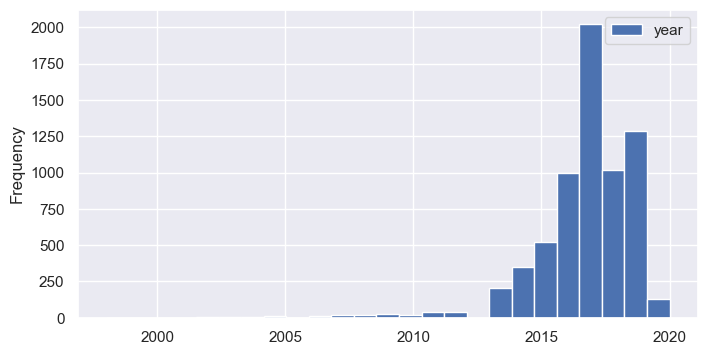

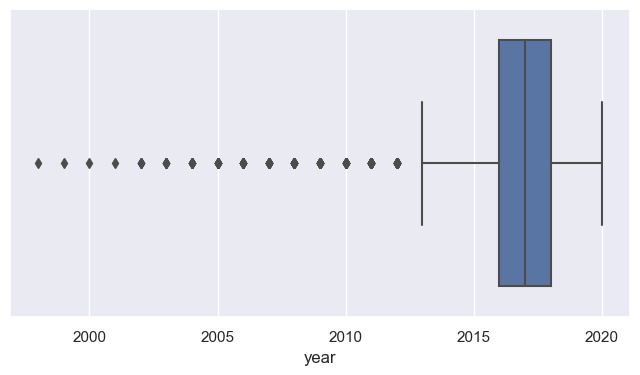

In [14]:
cars_df.plot(y='year', kind='hist', bins=25)
plt.show()
sns.boxplot(x='year', data=cars_df, orient="h")
plt.show()

In [15]:
print(cars_df["year"].value_counts(sort=True))

2017    2019
2019    1286
2018    1015
2016     997
2015     524
2014     352
2013     204
2020     128
2012      42
2011      40
2009      29
2007      20
2008      19
2010      18
2005      12
2006      11
2004       7
2003       6
2002       4
2001       1
1999       1
2000       1
1998       1
Name: year, dtype: int64


In [16]:
cars_df.drop(cars_df[cars_df['year'] < 2013].index, inplace=True)
print(cars_df['year'].value_counts())

2017    2019
2019    1286
2018    1015
2016     997
2015     524
2014     352
2013     204
2020     128
Name: year, dtype: int64


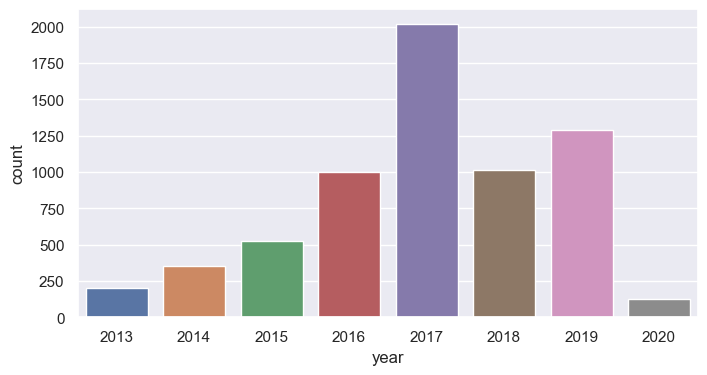

In [17]:
sns.countplot(x='year', data=cars_df)
plt.show()


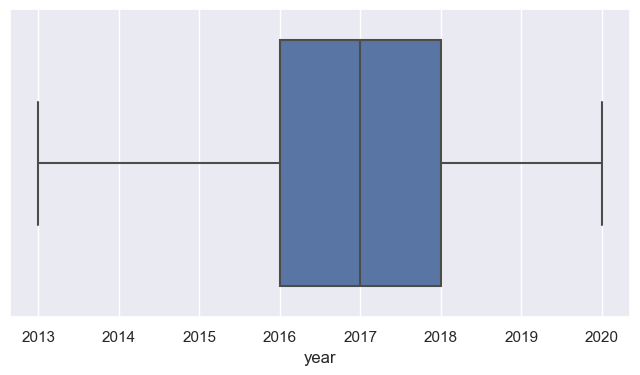

In [18]:
sns.boxplot(x='year', data=cars_df, orient="h")
plt.show()

## Inspecting, cleaning & transforming column: "engine_size".
- Adding categorical feature: engine_cat with values: "1.0-1.3" / "1.4-1.6" / "1.8-2.0" / "2.2-3.0"

In [19]:
cars_df['engine_size'].value_counts()

1.0    2010
1.5    1416
1.8    1250
1.3     550
2.0     376
1.2     303
2.5     248
1.6     154
2.4      70
2.2      40
2.8      36
1.4      35
3.0      30
0.0       6
4.5       1
Name: engine_size, dtype: int64

In [20]:
cars_df[cars_df['engine_size'] == 4.5]

,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size
6697,Land Cruiser,2014,44990,Automatic,60000,Diesel,540,29.7,4.5


In [21]:
cars_df[cars_df['model'] == 'Land Cruiser'].groupby('engine_size').count()

,model,year,price,transmission,mileage,fuel_type,tax,mpg
engine_size,,,,,,,,
2.8,36,36,36,36,36,36,36,36
3.0,8,8,8,8,8,8,8,8
4.5,1,1,1,1,1,1,1,1


In [22]:
cars_df.drop(cars_df[cars_df['engine_size'] == 4.5].index, inplace=True)

In [23]:
print(cars_df[cars_df["engine_size"].isin([0])])

      model  year  price transmission  mileage fuel_type  tax   mpg  \
2534  Yaris  2016  12300       Manual     6148    Hybrid    0  86.0   
2544  Yaris  2016  11000    Automatic    39909    Hybrid    0  86.0   
5125   Aygo  2019   9800       Manual     3635    Petrol  150  56.5   
5232   Aygo  2019   8000       Manual     8531    Petrol  145  56.5   
5256   Aygo  2019   8000       Manual     5354    Petrol  145  56.5   
5959   C-HR  2017  14300       Manual    46571    Petrol  145  47.1   

      engine_size  
2534          0.0  
2544          0.0  
5125          0.0  
5232          0.0  
5256          0.0  
5959          0.0  


In [24]:
#Getting data for imputation 1
print(cars_df[(cars_df["model"] == "Yaris") & (cars_df["transmission"] == "Manual") & 
              (cars_df["fuel_type"] == "Hybrid")])

      model  year  price transmission  mileage fuel_type  tax   mpg  \
1165  Yaris  2018  13999       Manual    12080    Hybrid  135  67.3   
1473  Yaris  2018  14290       Manual     5644    Hybrid  140  67.3   
1504  Yaris  2018  12890       Manual     9446    Hybrid  140  67.3   
2534  Yaris  2016  12300       Manual     6148    Hybrid    0  86.0   

      engine_size  
1165          1.5  
1473          1.5  
1504          1.5  
2534          0.0  


In [25]:
cars_df[(cars_df["model"] == "Yaris") & (cars_df["transmission"] == "Automatic") & 
        (cars_df["fuel_type"] == "Hybrid")]

,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size
815,Yaris,2016,11500,Automatic,31911,Hybrid,0,78.0,1.5
816,Yaris,2014,8500,Automatic,72053,Hybrid,0,76.3,1.5
818,Yaris,2019,15000,Automatic,1401,Hybrid,140,76.3,1.5
820,Yaris,2016,12500,Automatic,23150,Hybrid,0,78.0,1.5
829,Yaris,2016,12695,Automatic,15945,Hybrid,0,78.0,1.5
...,...,...,...,...,...,...,...,...,...
2925,Yaris,2019,15250,Automatic,4126,Hybrid,135,76.3,1.5
2926,Yaris,2019,15250,Automatic,2789,Hybrid,135,76.3,1.5
2927,Yaris,2019,14995,Automatic,3385,Hybrid,135,76.3,1.5
2928,Yaris,2019,15250,Automatic,4193,Hybrid,135,76.3,1.5


In [26]:
# Impute missing values 1
rows_to_repl2=[2544, 2534]

for row in rows_to_repl2:
    cars_df.at[row, 'engine_size'] = 1.5
    print(row, "\n", cars_df.loc[row], "\n")


2544 
 model               Yaris
year                 2016
price               11000
transmission    Automatic
mileage             39909
fuel_type          Hybrid
tax                     0
mpg                  86.0
engine_size           1.5
Name: 2544, dtype: object 

2534 
 model            Yaris
year              2016
price            12300
transmission    Manual
mileage           6148
fuel_type       Hybrid
tax                  0
mpg               86.0
engine_size        1.5
Name: 2534, dtype: object 



In [27]:
#Getting data for imputation 2
cars_df[(cars_df["model"] == "Aygo") & (cars_df["transmission"] == "Manual") & (cars_df["fuel_type"] == "Petrol")]

,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size
3647,Aygo,2017,7100,Manual,32351,Petrol,0,68.9,1.0
3648,Aygo,2016,6500,Manual,26193,Petrol,0,69.0,1.0
3649,Aygo,2017,7650,Manual,12134,Petrol,0,68.9,1.0
3650,Aygo,2016,6999,Manual,21123,Petrol,0,69.0,1.0
3651,Aygo,2015,6495,Manual,33931,Petrol,0,69.0,1.0
...,...,...,...,...,...,...,...,...,...
5596,Aygo,2018,8794,Manual,4075,Petrol,145,56.5,1.0
5599,Aygo,2019,9995,Manual,2241,Petrol,145,56.5,1.0
5600,Aygo,2019,9795,Manual,2743,Petrol,145,56.5,1.0
5603,Aygo,2019,9694,Manual,100,Petrol,145,56.5,1.0


In [28]:
# Impute missing values 2
rows_to_repl2=[5125, 5232, 5256]
for row in rows_to_repl2:
    cars_df.at[row, 'engine_size'] = 1.0
    print(row, "\n", cars_df.loc[row], "\n")
    

5125 
 model             Aygo
year              2019
price             9800
transmission    Manual
mileage           3635
fuel_type       Petrol
tax                150
mpg               56.5
engine_size        1.0
Name: 5125, dtype: object 

5232 
 model             Aygo
year              2019
price             8000
transmission    Manual
mileage           8531
fuel_type       Petrol
tax                145
mpg               56.5
engine_size        1.0
Name: 5232, dtype: object 

5256 
 model             Aygo
year              2019
price             8000
transmission    Manual
mileage           5354
fuel_type       Petrol
tax                145
mpg               56.5
engine_size        1.0
Name: 5256, dtype: object 



In [29]:
cars_df[(cars_df["model"] == "C-HR") & (cars_df["transmission"] == "Manual") & 
                 (cars_df["fuel_type"] == "Petrol")]

,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size
5612,C-HR,2019,19495,Manual,11759,Petrol,145,41.5,1.2
5614,C-HR,2017,13298,Manual,24254,Petrol,150,47.9,1.2
5615,C-HR,2019,16495,Manual,14372,Petrol,145,41.5,1.2
5618,C-HR,2017,15495,Manual,29557,Petrol,145,47.9,1.2
5620,C-HR,2017,13998,Manual,33745,Petrol,150,47.1,1.2
...,...,...,...,...,...,...,...,...,...
6043,C-HR,2018,16500,Manual,34161,Petrol,145,47.1,1.2
6054,C-HR,2017,14995,Manual,28360,Petrol,145,47.1,1.2
6056,C-HR,2019,15000,Manual,17486,Petrol,145,41.5,1.2
6076,C-HR,2018,18999,Manual,16200,Petrol,150,34.5,1.2


In [30]:
# Impute missing values 3
cars_df.at[5959, 'engine_size'] = 1.2
print('5959', "\n", cars_df.loc[5959], "\n")

5959 
 model             C-HR
year              2017
price            14300
transmission    Manual
mileage          46571
fuel_type       Petrol
tax                145
mpg               47.1
engine_size        1.2
Name: 5959, dtype: object 



In [31]:
print(cars_df["engine_size"].value_counts())

1.0    2013
1.5    1418
1.8    1250
1.3     550
2.0     376
1.2     304
2.5     248
1.6     154
2.4      70
2.2      40
2.8      36
1.4      35
3.0      30
Name: engine_size, dtype: int64


['1.8-2.0', '1.0-1.3', '2.2-3.0', '1.4-1.6']
Categories (4, object): ['1.0-1.3' < '1.4-1.6' < '1.8-2.0' < '2.2-3.0']
1.0-1.3    2867
1.4-1.6    1607
1.8-2.0    1626
2.2-3.0     424
Name: engine_cat, dtype: int64


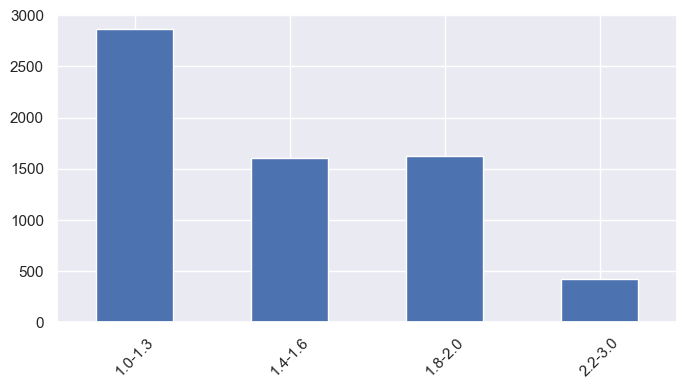

In [32]:
#Collapsing engine_size numerical data in to categories: 1.0-1.3 litres, 1.4-1.6 litres, 1.8-2.0 litres, 2.2-3.0 and 3.0-plus
engine_ranges2=[1, 1.4, 1.7, 2.1, 3.1]
cat_names2=['1.0-1.3', '1.4-1.6', '1.8-2.0', '2.2-3.0']
cars_df["engine_cat"] = pd.cut(cars_df["engine_size"], bins=engine_ranges2, labels=cat_names2, right=False)
print(cars_df["engine_cat"].unique())
print(cars_df["engine_cat"].value_counts(sort=False))
cars_df["engine_cat"].value_counts(sort=False).plot(kind="bar", rot=45)
plt.show()

## Inspecting & cleaning column: "fuel_type". 
- Adding categorical feature: fuel_cat with 2 values: "fossil" / "hybrid".

In [33]:
cars_df.fuel_type.value_counts(dropna=False)

Petrol    3942
Hybrid    2021
Diesel     459
Other      102
Name: fuel_type, dtype: int64

In [34]:
cars_df[cars_df.fuel_type=='Other'].model.value_counts()

Aygo       59
Prius      17
Yaris       8
C-HR        7
RAV4        5
Corolla     2
Verso       2
Auris       1
Supra       1
Name: model, dtype: int64

In [35]:
cars_df[cars_df.model == 'Aygo'].fuel_type.value_counts()

Petrol    1868
Other       59
Name: fuel_type, dtype: int64

In [36]:
# Impute wrong values
for i in cars_df[(cars_df.model == 'Aygo') & (cars_df.fuel_type == 'Other')].index:
    cars_df.at[i, 'fuel_type'] = 'Petrol'

In [37]:
cars_df[cars_df.model == 'Prius'].fuel_type.value_counts()

Hybrid    201
Other      17
Name: fuel_type, dtype: int64

In [38]:
# Impute wrong values
for i in cars_df[(cars_df.model == 'Prius') & (cars_df.fuel_type == 'Other')].index:
    cars_df.at[i, 'fuel_type'] = 'Hybrid'

In [39]:
cars_df.fuel_type.value_counts(dropna=False)

Petrol    4001
Hybrid    2038
Diesel     459
Other       26
Name: fuel_type, dtype: int64

In [40]:
cars_df[cars_df.fuel_type=='Other'].model.value_counts()

Yaris      8
C-HR       7
RAV4       5
Corolla    2
Verso      2
Auris      1
Supra      1
Name: model, dtype: int64

In [41]:
cars_df[cars_df.model == 'Corolla'].fuel_type.value_counts()

Hybrid    181
Petrol     74
Other       2
Name: fuel_type, dtype: int64

In [42]:
cars_df[cars_df.model == 'Yaris'].fuel_type.value_counts()

Petrol    1479
Hybrid     555
Diesel      20
Other        8
Name: fuel_type, dtype: int64

In [43]:
cars_df[cars_df.model == 'C-HR'].fuel_type.value_counts()

Hybrid    352
Petrol    120
Other       7
Name: fuel_type, dtype: int64

In [44]:
cars_df[cars_df.model == 'RAV4'].fuel_type.value_counts()

Hybrid    230
Diesel    162
Petrol     51
Other       5
Name: fuel_type, dtype: int64

In [45]:
cars_df.drop(cars_df[cars_df['fuel_type']=='Other'].index, inplace=True)
cars_df.reset_index(inplace=True, drop=True)

In [46]:
cars_df.fuel_type.value_counts(dropna=False)

Petrol    4001
Hybrid    2038
Diesel     459
Name: fuel_type, dtype: int64

In [47]:
mapping = {'Diesel':'fossil', 'Petrol':'fossil', 'Hybrid':'hybrid'}
cars_df['fuel_cat'] = cars_df['fuel_type'].map(mapping)
print(cars_df['fuel_cat'].unique())

['fossil' 'hybrid']


## Cleaning column "price"

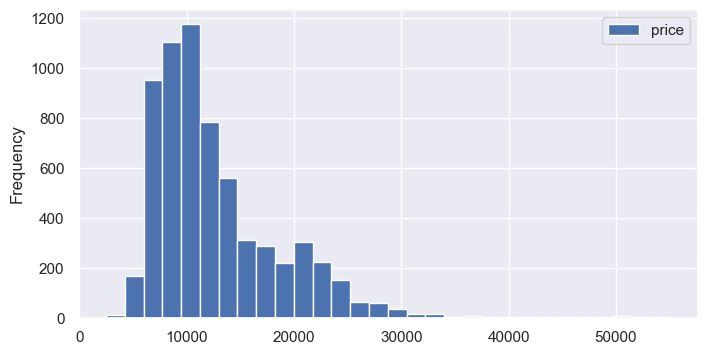

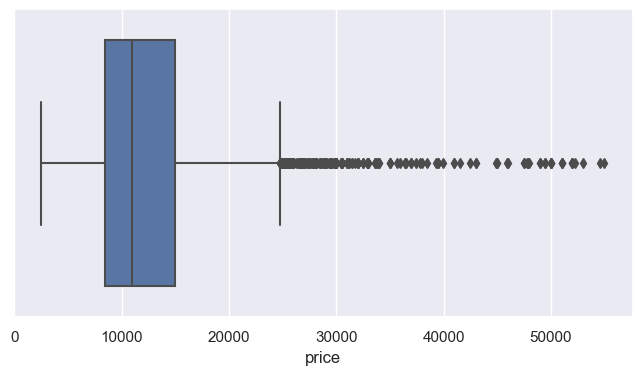

In [48]:
cars_df.plot(y='price', kind='hist', bins=30)
plt.show()
sns.boxplot(x='price', data=cars_df, orient="h")
plt.show()

In [49]:
cars_df.drop(cars_df[cars_df['price']>35000].index, inplace=True)

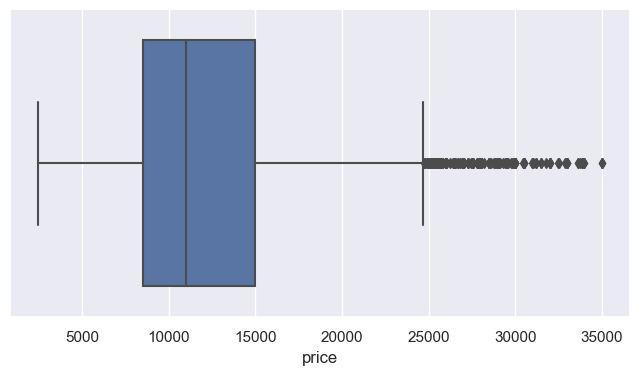

In [50]:
sns.boxplot(x='price', data=cars_df, orient="h")
plt.show()

In [51]:
cars_df[cars_df.price >25000].model.value_counts()

RAV4            48
C-HR            45
Corolla         30
GT86            17
Prius           14
Hilux           13
Land Cruiser    12
Camry           10
Proace Verso     9
Yaris            1
Name: model, dtype: int64

## Exploring temporal trends 

In [52]:
def trends_year(dataframe, column, proportion=True):
    if proportion == True:
        data=dataframe.groupby("year", as_index=False)[column].value_counts(normalize=True)
        sns.lineplot(data=data, x='year', y='proportion', style=column, hue=column, markers=True, dashes=False)
        plt.show()
    else:
        data=dataframe.groupby("year", as_index=False)[column].value_counts()
        sns.lineplot(data=data, x='year', y='count', style=column, hue=column, markers=True, dashes=False)
        plt.show()
        
    

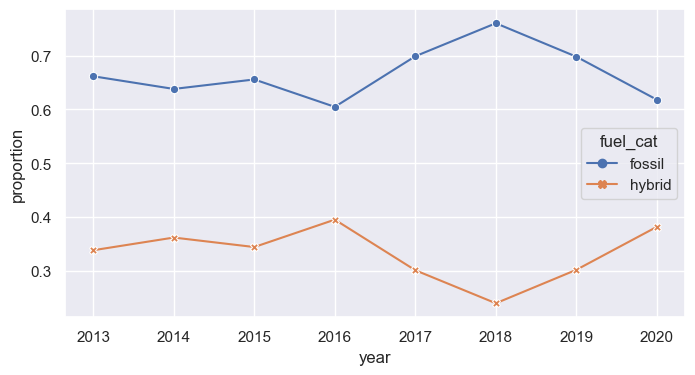

In [53]:
trends_year(cars_df, 'fuel_cat')

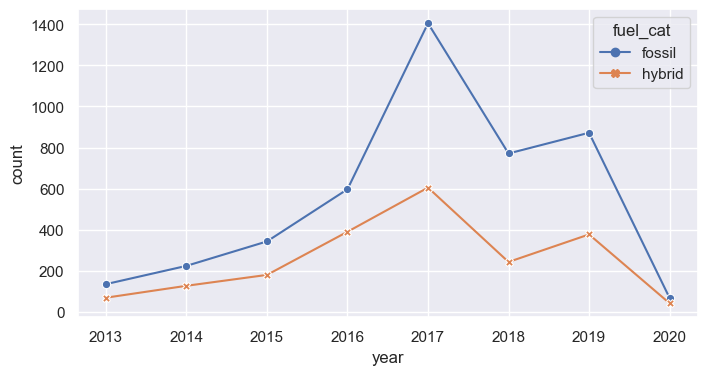

In [54]:
trends_year(cars_df, 'fuel_cat', proportion=False)

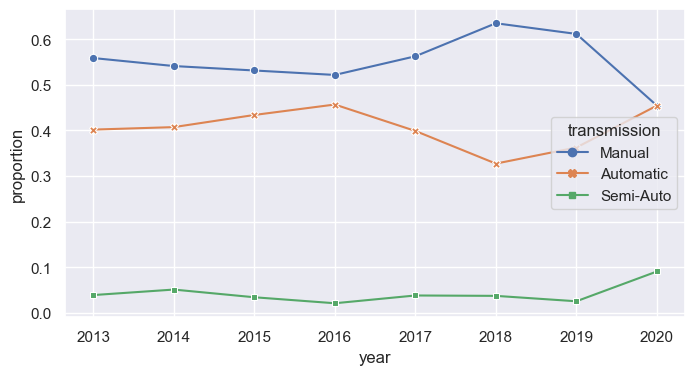

In [55]:
trends_year(cars_df, 'transmission')

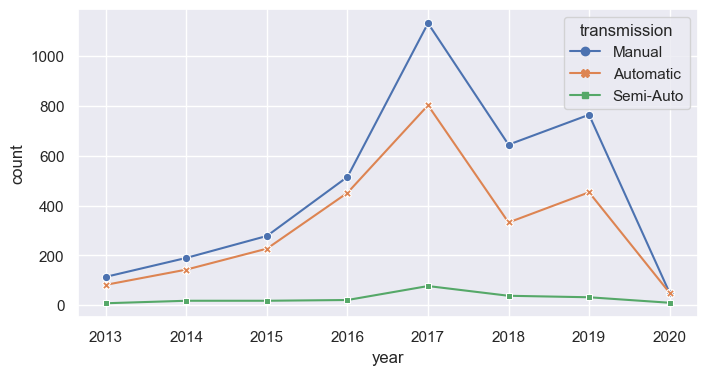

In [56]:
trends_year(cars_df, 'transmission', proportion=False)

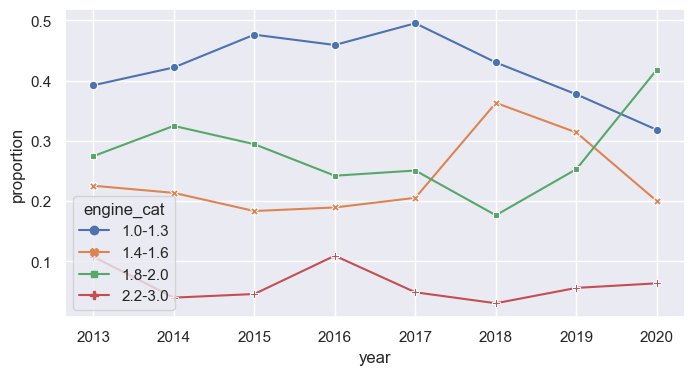

In [57]:
trends_year(cars_df, 'engine_cat',)

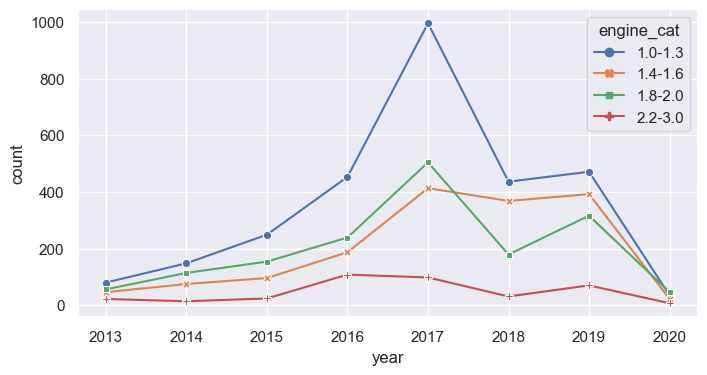

In [58]:
trends_year(cars_df, 'engine_cat', proportion=False)

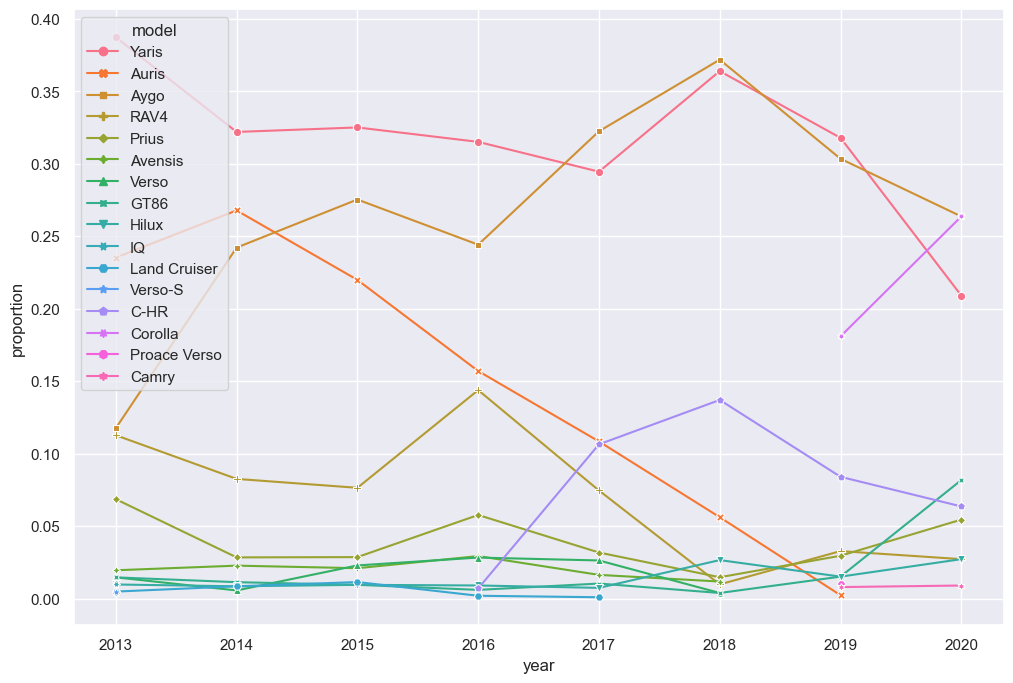

In [59]:
fig, ax  = plt.subplots(figsize=(12,8))
trends_year(cars_df, "model")

## Keeping last 4 years for further analysis

In [60]:
cars_2017_2020 = cars_df.loc[(cars_df.year >= 2017)].copy()

In [61]:
cars_2017_2020.model.value_counts(normalize=True)

Aygo            0.326945
Yaris           0.315081
C-HR            0.106092
Auris           0.063427
Corolla         0.058179
RAV4            0.046543
Prius           0.027835
Hilux           0.014602
Verso           0.013005
GT86            0.012092
Avensis         0.010267
Proace Verso    0.002966
Camry           0.002510
Land Cruiser    0.000456
Name: model, dtype: float64

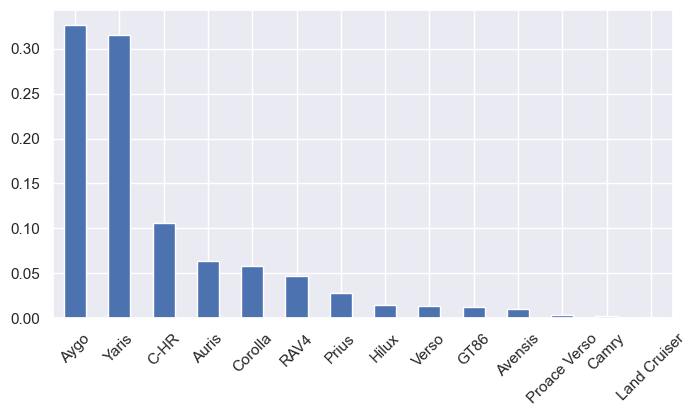

In [62]:
cars_2017_2020.model.value_counts(normalize=True).plot(kind='bar', rot=45)
plt.show()

## Categorize observations into 3 groups: 
- "1": best selling cars, 
- "2": Intermediate selling cars, 
- "3": least selling cars

In [63]:
# Categorize observations into 3 groups: 1: best selling cars, 2: Intermediate selling cars, 3: least selling cars
cars_2017_2020["selling_group"] = cars_2017_2020["model"] 

mapping_dict= {'GT86': "3",  'Corolla': "2", 'RAV4': "2",  'Yaris': "1",  'Auris': "2",  'Aygo': "1",  'C-HR': "2", 'Prius': "2",  'Avensis': "3",
 'Verso': "3", 'Hilux': "3", 'Proace Verso': "3", 'Land Cruiser': "3", 'Camry': "3"}

cars_2017_2020["selling_group"]=cars_2017_2020["selling_group"].replace(mapping_dict).astype("category")
cars_2017_2020["selling_group"]=cars_2017_2020["selling_group"].cat.reorder_categories(new_categories=["1","2","3"], ordered=True)


selling_group  fuel_type
1              Petrol       0.897299
               Hybrid       0.100569
               Diesel       0.002132
2              Hybrid       0.734894
               Petrol       0.228852
               Diesel       0.036254
3              Petrol       0.489796
               Diesel       0.465306
               Hybrid       0.044898
Name: fuel_type, dtype: float64


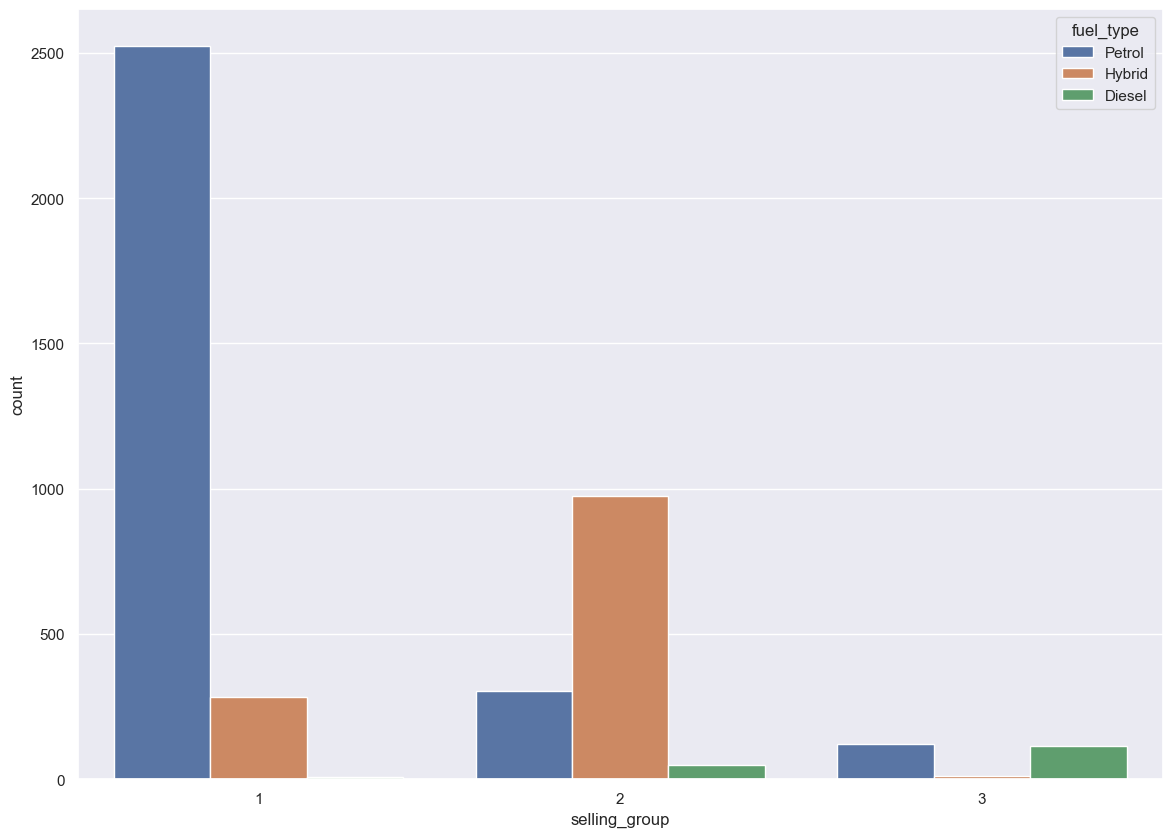

In [64]:
print(cars_2017_2020.groupby("selling_group")["fuel_type"].value_counts(normalize=True))
fig, ax  = plt.subplots(figsize=(14,10))
sns.countplot(x='selling_group', data=cars_2017_2020, hue="fuel_type")
plt.show()

selling_group         
1              1.0-1.3    0.593461
               1.4-1.6    0.406183
               1.8-2.0    0.000355
               2.2-3.0    0.000000
2              1.8-2.0    0.697130
               1.0-1.3    0.201662
               2.2-3.0    0.097432
               1.4-1.6    0.003776
3              1.8-2.0    0.493878
               2.2-3.0    0.314286
               1.4-1.6    0.191837
               1.0-1.3    0.000000
Name: engine_cat, dtype: float64

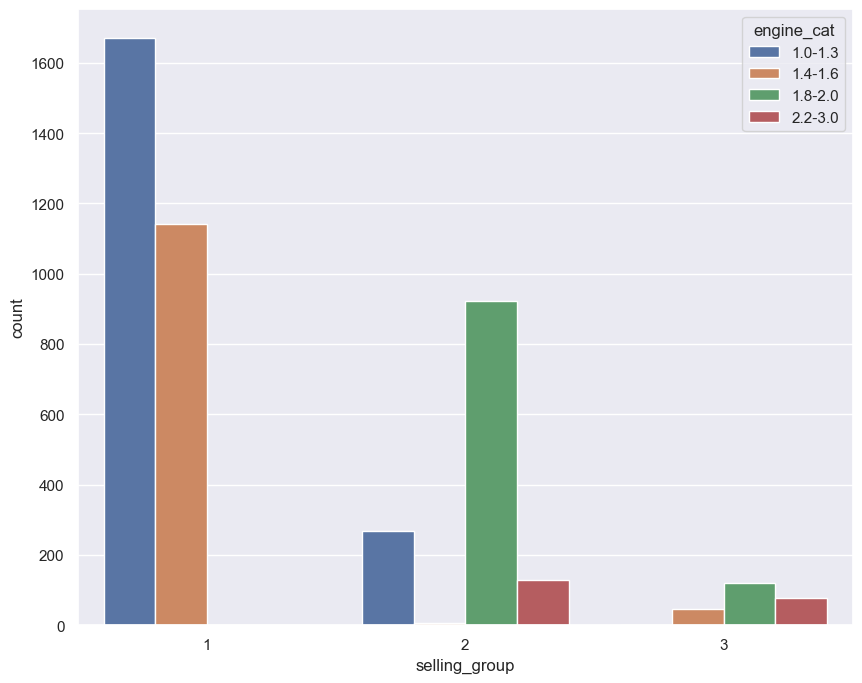

In [65]:
display(cars_2017_2020.groupby("selling_group")["engine_cat"].value_counts(normalize=True))
fig, ax  = plt.subplots(figsize=(10,8))
sns.countplot(x='selling_group', data=cars_2017_2020, hue="engine_cat")
plt.show()

selling_group  transmission
1              Manual          0.772210
               Automatic       0.182658
               Semi-Auto       0.045131
2              Automatic       0.796828
               Manual          0.203172
3              Manual          0.600000
               Automatic       0.277551
               Semi-Auto       0.122449
Name: transmission, dtype: float64

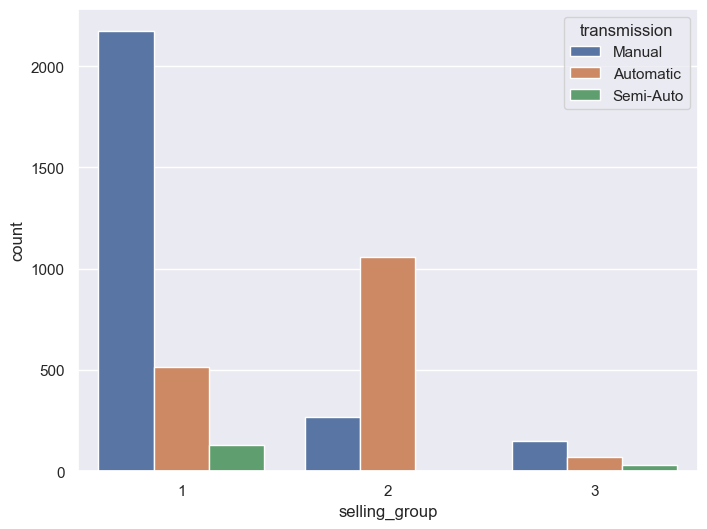

In [66]:
display(cars_2017_2020.groupby("selling_group")["transmission"].value_counts(normalize=True))
fig, ax  = plt.subplots(figsize=(8,6))
sns.countplot(x='selling_group', data=cars_2017_2020, hue="transmission")
plt.show()

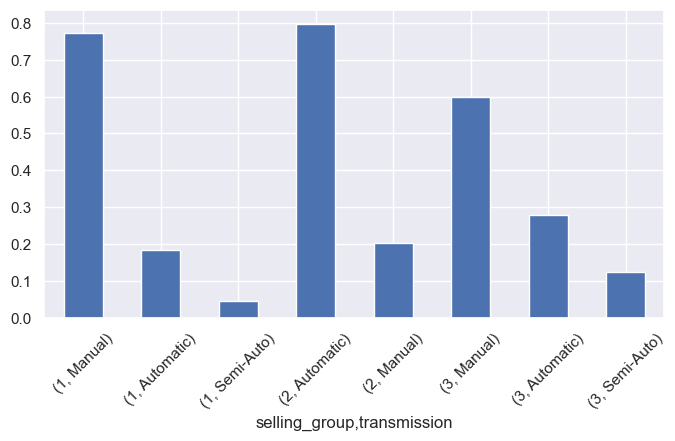

In [67]:
cars_2017_2020.groupby("selling_group")["transmission"].value_counts(normalize=True).plot(kind="bar", rot=45)
plt.show()

In [68]:
print(cars_2017_2020.groupby("year")["selling_group"].value_counts(normalize=True))

year   
2017  1    0.616915
      2    0.321393
      3    0.061692
2018  1    0.735700
      2    0.217949
      3    0.046351
2019  1    0.621297
      2    0.329864
      3    0.048839
2020  1    0.472727
      2    0.409091
      3    0.118182
Name: selling_group, dtype: float64


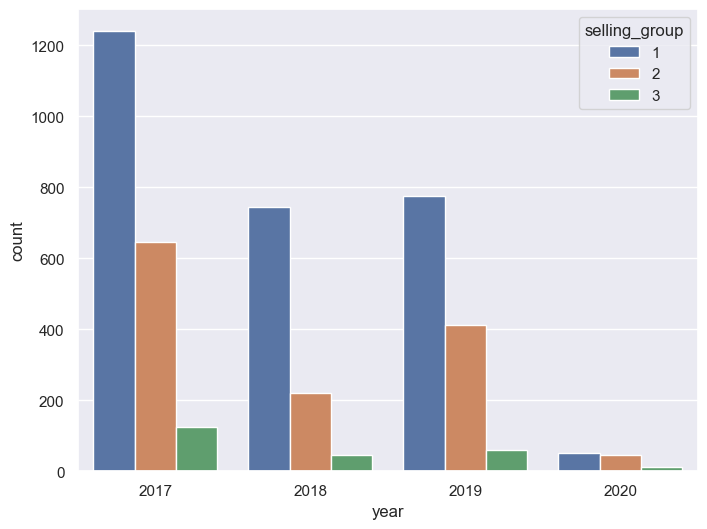

In [69]:
fig, ax  = plt.subplots(figsize=(8,6))
sns.countplot(x='year', data=cars_2017_2020, hue="selling_group")
plt.show()

In [70]:
cars_2017_2020.groupby('selling_group')["price"].mean()

selling_group
1     9998.683369
2    19757.790030
3    19196.346939
Name: price, dtype: float64

In [71]:
cars_2017_2020.groupby('selling_group')["price"].std()

selling_group
1    2251.874623
2    4583.342292
3    6049.547760
Name: price, dtype: float64

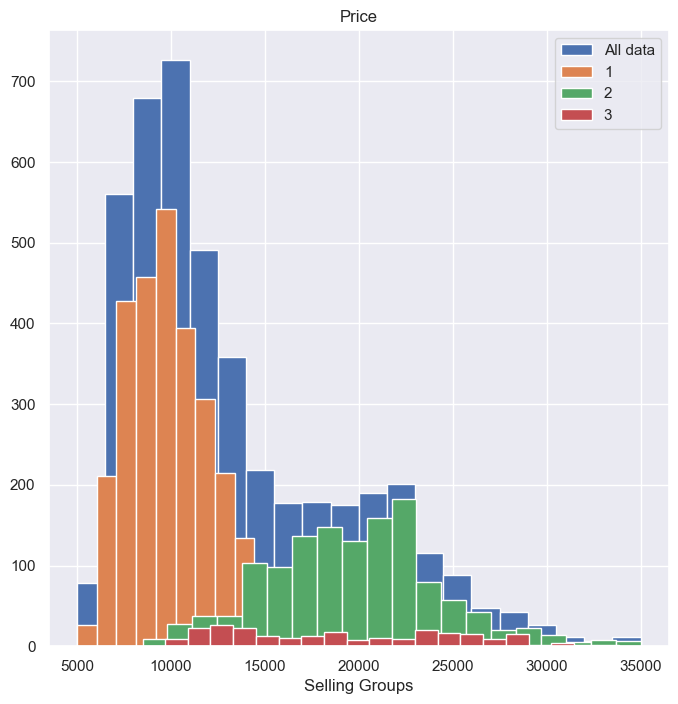

In [72]:
fig, ax  = plt.subplots(figsize=(8,8))
plt.hist(x=cars_2017_2020["price"], bins=20, label="All data")
plt.hist(x=cars_2017_2020[cars_2017_2020["selling_group"]=="1"]["price"], bins=20, label="1")
plt.hist(x=cars_2017_2020[cars_2017_2020["selling_group"]=="2"]["price"], bins=20, label="2")
plt.hist(x=cars_2017_2020[cars_2017_2020["selling_group"]=="3"]["price"], bins=20, label="3")
ax.set_title("Price")
ax.set_xlabel("Selling Groups")
ax.legend()
plt.show()

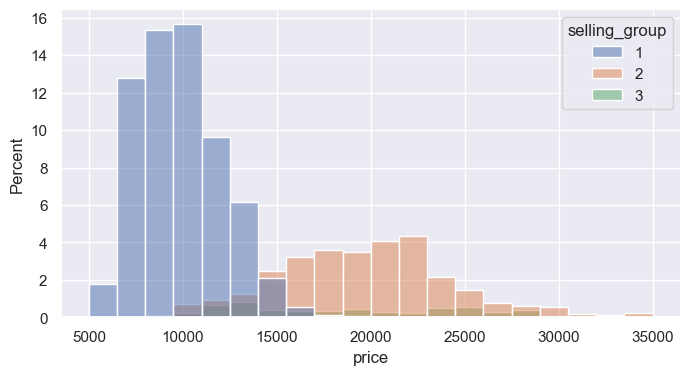

In [73]:
sns.histplot(data=cars_2017_2020, x='price', hue="selling_group", bins=20, stat="percent")
plt.show()

### Define function for displaying cross tabulation

In [74]:
def cross_tab(dataframe, column_a, column_b, margins=False, normalize=True):
    pd.crosstab(dataframe[column_a], dataframe[column_b], margins=margins, normalize=normalize).plot(kind="bar",  rot=45)
    plt.show()
    display(pd.crosstab(dataframe[column_b], dataframe[column_a], margins=margins, normalize=normalize))

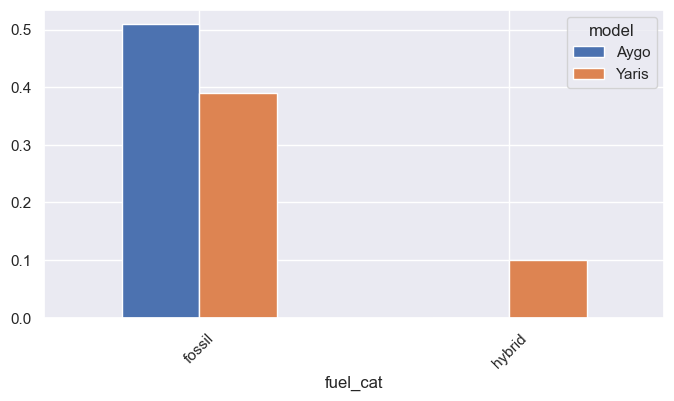

fuel_cat,fossil,hybrid
model,,
Aygo,0.509240,0.000000
Yaris,0.390192,0.100569


In [75]:
cross_tab(cars_2017_2020[cars_2017_2020["selling_group"]=="1"], 'fuel_cat', 'model')

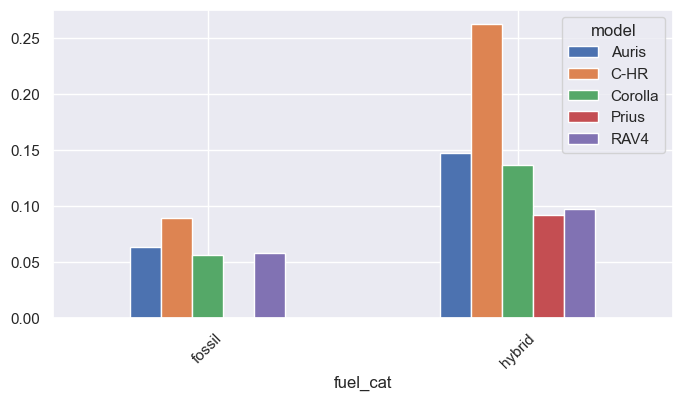

fuel_cat,fossil,hybrid
model,,
Auris,0.062689,0.147281
C-HR,0.089124,0.262085
Corolla,0.055891,0.136707
Prius,0.000000,0.092145
RAV4,0.057402,0.096677


In [76]:
cross_tab(cars_2017_2020[cars_2017_2020["selling_group"]=="2"], 'fuel_cat', 'model')

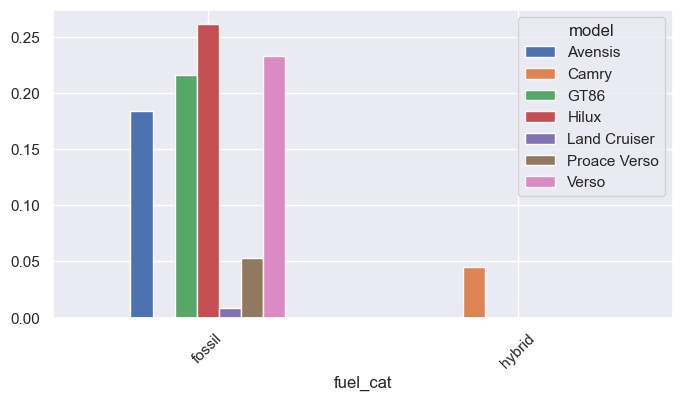

fuel_cat,fossil,hybrid
model,,
Avensis,0.183673,0.000000
Camry,0.000000,0.044898
GT86,0.216327,0.000000
Hilux,0.261224,0.000000
Land Cruiser,0.008163,0.000000
Proace Verso,0.053061,0.000000
Verso,0.232653,0.000000


In [77]:
cross_tab(cars_2017_2020[cars_2017_2020["selling_group"]=="3"], 'fuel_cat', 'model')

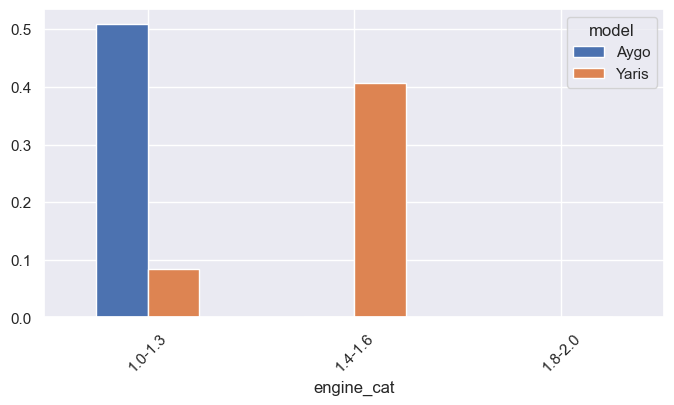

engine_cat,1.0-1.3,1.4-1.6,1.8-2.0
model,,,
Aygo,0.509240,0.000000,0.000000
Yaris,0.084222,0.406183,0.000355


In [78]:
cross_tab(cars_2017_2020[cars_2017_2020["selling_group"]=="1"], 'engine_cat', 'model')

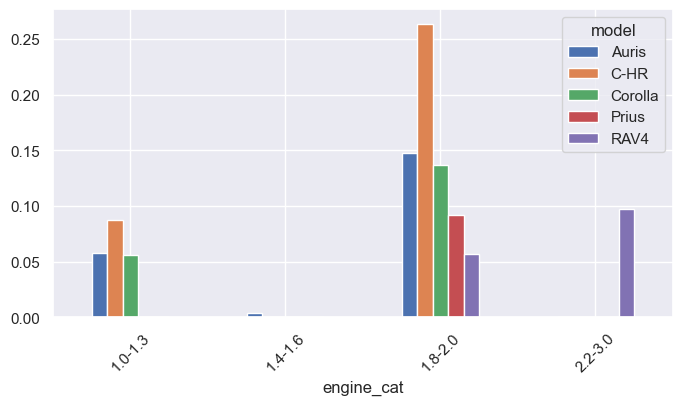

engine_cat,1.0-1.3,1.4-1.6,1.8-2.0,2.2-3.0
model,,,,
Auris,0.058157,0.003776,0.148036,0.000000
C-HR,0.087613,0.000000,0.263595,0.000000
Corolla,0.055891,0.000000,0.136707,0.000000
Prius,0.000000,0.000000,0.092145,0.000000
RAV4,0.000000,0.000000,0.056647,0.097432


In [79]:
cross_tab(cars_2017_2020[cars_2017_2020["selling_group"]=="2"], 'engine_cat', 'model')

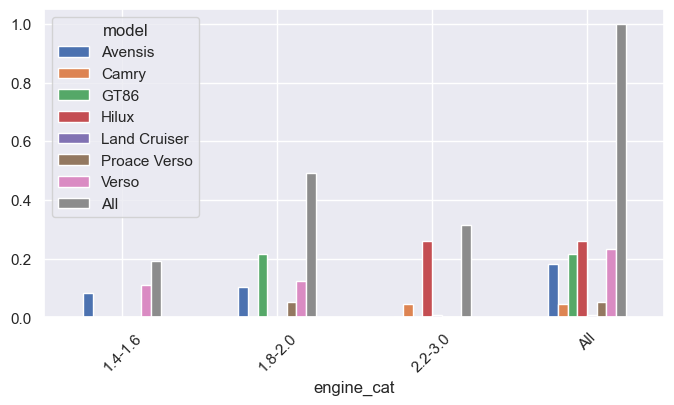

engine_cat,1.4-1.6,1.8-2.0,2.2-3.0,All
model,,,,
Avensis,0.081633,0.102041,0.000000,0.183673
Camry,0.000000,0.000000,0.044898,0.044898
GT86,0.000000,0.216327,0.000000,0.216327
Hilux,0.000000,0.000000,0.261224,0.261224
Land Cruiser,0.000000,0.000000,0.008163,0.008163
Proace Verso,0.000000,0.053061,0.000000,0.053061
Verso,0.110204,0.122449,0.000000,0.232653
All,0.191837,0.493878,0.314286,1.000000


In [80]:
cross_tab(cars_2017_2020[cars_2017_2020["selling_group"]=="3"], 'engine_cat', 'model', margins=True)

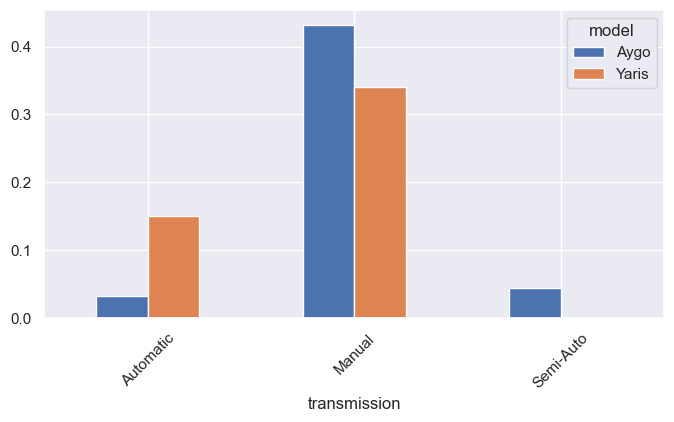

transmission,Automatic,Manual,Semi-Auto
model,,,
Aygo,0.031983,0.43248,0.044776
Yaris,0.150675,0.33973,0.000355


In [81]:
cross_tab(cars_2017_2020[cars_2017_2020["selling_group"]=="1"], 'transmission', 'model')

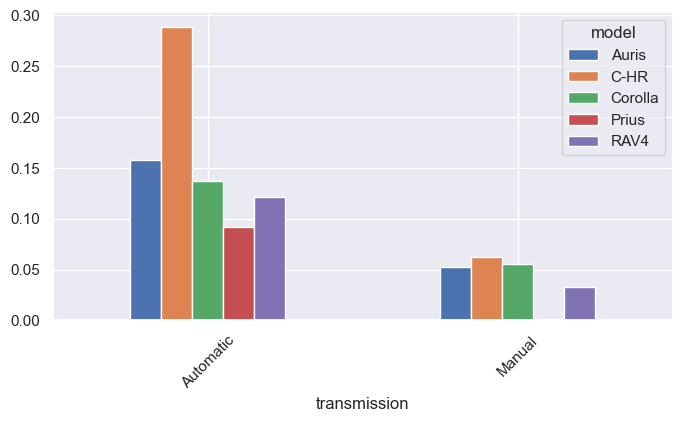

transmission,Automatic,Manual
model,,
Auris,0.157855,0.052115
C-HR,0.288520,0.062689
Corolla,0.136707,0.055891
Prius,0.092145,0.000000
RAV4,0.121601,0.032477


In [82]:
cross_tab(cars_2017_2020[cars_2017_2020["selling_group"]=="2"], 'transmission', 'model')

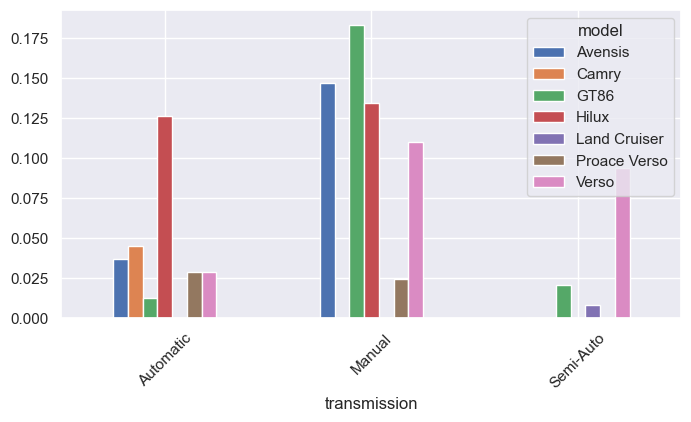

transmission,Automatic,Manual,Semi-Auto
model,,,
Avensis,0.036735,0.146939,0.000000
Camry,0.044898,0.000000,0.000000
GT86,0.012245,0.183673,0.020408
Hilux,0.126531,0.134694,0.000000
Land Cruiser,0.000000,0.000000,0.008163
Proace Verso,0.028571,0.024490,0.000000
Verso,0.028571,0.110204,0.093878


In [83]:
cross_tab(cars_2017_2020[cars_2017_2020["selling_group"]=="3"], 'transmission', 'model')

## Top 5 least selling cars

In [84]:
least_cars = cars_2017_2020['model'].value_counts(ascending=True).head().index
least_cars

Index(['Land Cruiser', 'Camry', 'Proace Verso', 'Avensis', 'GT86'], dtype='object')

In [85]:
top_least_cars = cars_2017_2020.loc[cars_2017_2020["model"].isin(least_cars)]

In [86]:
top_least_cars

,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,engine_cat,fuel_cat,selling_group
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0,1.8-2.0,fossil,3
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0,1.8-2.0,fossil,3
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0,1.8-2.0,fossil,3
5,GT86,2017,15998,Manual,26919,Petrol,260,36.2,2.0,1.8-2.0,fossil,3
6,GT86,2017,18522,Manual,10456,Petrol,145,36.2,2.0,1.8-2.0,fossil,3
...,...,...,...,...,...,...,...,...,...,...,...,...
6490,Camry,2019,26491,Automatic,4416,Hybrid,135,52.3,2.5,2.2-3.0,hybrid,3
6491,Camry,2019,27550,Automatic,4189,Hybrid,135,52.3,2.5,2.2-3.0,hybrid,3
6492,Camry,2019,25490,Automatic,6340,Hybrid,135,52.3,2.5,2.2-3.0,hybrid,3
6493,Camry,2019,26990,Automatic,3000,Hybrid,135,52.3,2.5,2.2-3.0,hybrid,3


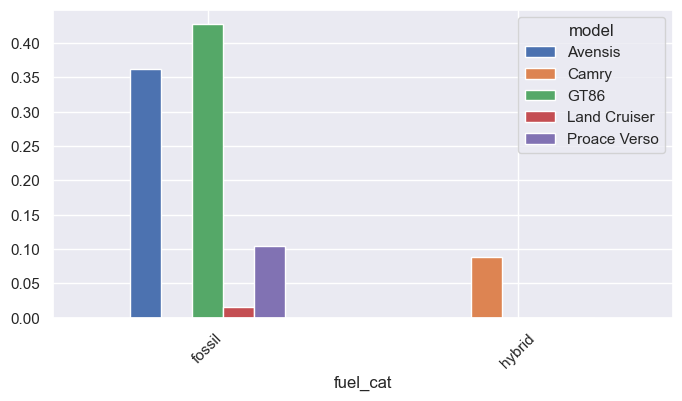

fuel_cat,fossil,hybrid
model,,
Avensis,0.362903,0.00000
Camry,0.000000,0.08871
GT86,0.427419,0.00000
Land Cruiser,0.016129,0.00000
Proace Verso,0.104839,0.00000


In [87]:
cross_tab(top_least_cars, 'fuel_cat', 'model')

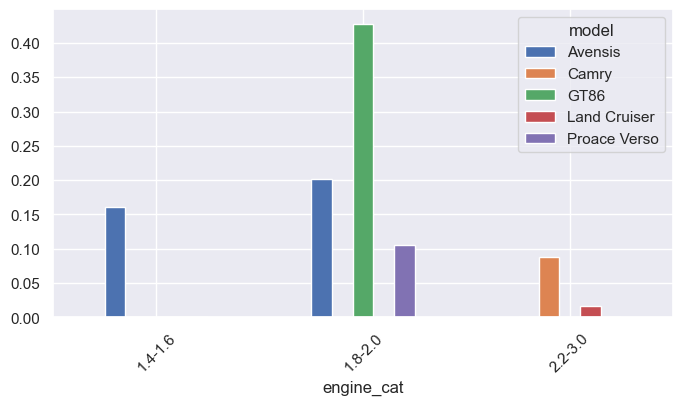

engine_cat,1.4-1.6,1.8-2.0,2.2-3.0
model,,,
Avensis,0.16129,0.201613,0.000000
Camry,0.00000,0.000000,0.088710
GT86,0.00000,0.427419,0.000000
Land Cruiser,0.00000,0.000000,0.016129
Proace Verso,0.00000,0.104839,0.000000


In [88]:
cross_tab(top_least_cars, 'engine_cat', 'model')

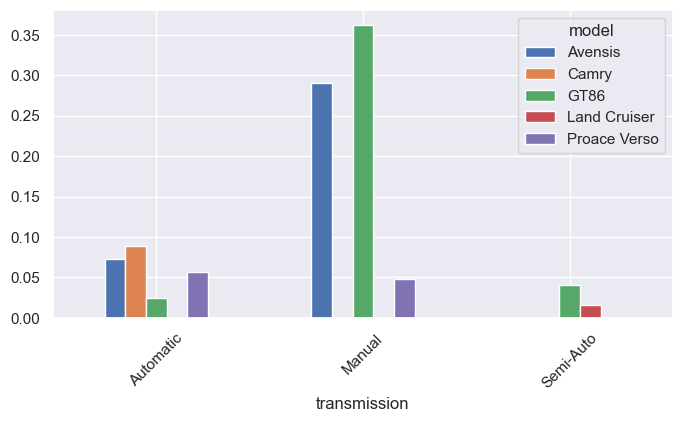

transmission,Automatic,Manual,Semi-Auto
model,,,
Avensis,0.072581,0.290323,0.000000
Camry,0.088710,0.000000,0.000000
GT86,0.024194,0.362903,0.040323
Land Cruiser,0.000000,0.000000,0.016129
Proace Verso,0.056452,0.048387,0.000000


In [89]:
cross_tab(top_least_cars, 'transmission', 'model')

In [90]:
top_least_cars.price.mean()

19844.233870967742

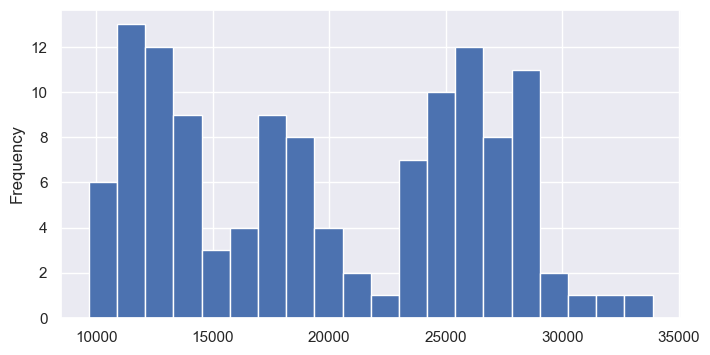

In [91]:
top_least_cars.price.plot(kind='hist', bins=20)
plt.show()

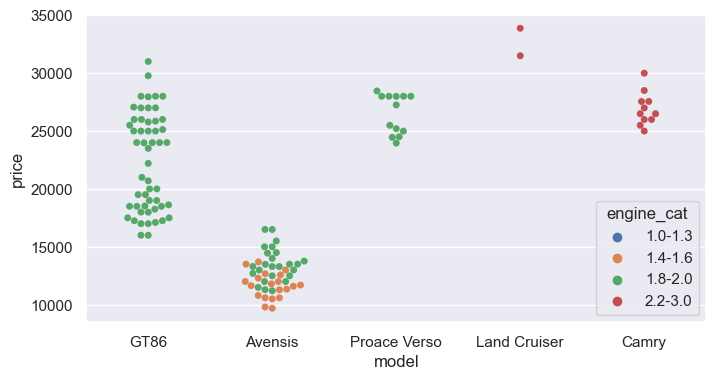

In [92]:
sns.swarmplot(data=top_least_cars, x='model', y="price", hue="engine_cat")
plt.show()